# Practical Session 2 - Done by : MEJRI Aymen

In [1]:
from random import randint

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.display import HTML
from scipy.special import logsumexp
from scipy.stats import multivariate_normal

matplotlib.style.use('ggplot')
# to embed figures in the notebook
%matplotlib inline
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [2]:
def ellipse(A, mu=np.array([0, 0]), col='b'):
    '''
    Creates an ellipse from short line segments y = A x + \mu 
    where x is on the unit circle.
    '''
    # This function will be used in the third question to find th contour of the cluster.

    N = 36
    th = np.arange(0, 2*np.pi+np.pi/N, np.pi/N)
    X = np.array([np.cos(th), np.sin(th)])

    Y = np.dot(A, X)
    ln = plt.Line2D(mu[0]+Y[0, :], mu[1]+Y[1, :],
                    markeredgecolor='k', linewidth=1, color=col)
    return ln

### Question 1:

We have : $$\gamma_i(x)=\frac{\pi_i \mathcal{N}(x,\mu_i,\Sigma_i)}{\sum_{j=1}^{K}\pi_j \mathcal{N}(x,\mu_j,\Sigma_j)}$$

$$\gamma_i(x)=\frac{\pi_i \frac{1}{\sqrt{(2\pi_i)^n}\sqrt{(|\Sigma_i|)}}e^{-\frac{(x-\mu_i)^T\Sigma_i^{-1}(x-\mu_i)}{2}}}{\sum_{j=1}^{K}\pi_j \frac{1}{\sqrt{(2\pi_j)^n}\sqrt{(|\Sigma_j|)}}e^{-\frac{(x-\mu_j)^T\Sigma_j^{-1}(x-\mu_j)}{2}}}$$


In [3]:
def log_numerator_i(x, pi, mu, sigma):
    return np.log(pi) - (0.5 * sigma.shape[0] * np.log(2. * np.pi) + 0.5 * np.log(np.linalg.det(np.linalg.cholesky(sigma))**2) + 0.5 * (x - mu).T.dot(np.linalg.inv(sigma)).dot(x - mu))


def log_gamma_k(x, j, log_pi, log_mu, log_sigma):
    K = log_pi.shape[0]
    return log_numerator_i(x, log_pi[j], log_mu[j], log_sigma[j]) - logsumexp([log_numerator_i(x, log_pi[i], log_mu[i], log_sigma[i]) for i in range(K)])

### Question 2:

**Theoritical study :**

We should maximize this expression :
$$\log(p(x,z|\pi,\mu,\Sigma^2))=\sum_n \sum_k \mathbb{1}_{z_n=k}log(\pi_k \mathcal{N}(x_n|\mu_k,\Sigma_k)) $$ 
$$ such that : \sum_{k=1}^K\pi_k=1$$  

So when we compute the expectation of the indicator function $\mathbb{1_{z_n=k}}$ according to $p(z|x,\pi,\mu,\Sigma^2)$ we have :
$\mathbb{E}_{p(z|x,\pi,\mu,\Sigma^2)}(\mathbb{1_{z_n=k}})=p(z_n=k|x,\pi,\mu,\Sigma^2)$<br>
so : $\mathbb{E}_{p(z|x,\pi,\mu,\Sigma^2)}(\mathbb{1_{z_n=k}})=\frac{p(z_n=k|x,\pi,\mu,\Sigma^2)p(z_n=k|x,\pi,\mu,\Sigma^2)}{\sum_{k=1}^Kp(x_n|z_n=k,\mu,\Sigma)p(z_n=k|\pi)}$=$ \frac{\pi_k \mathcal{N}(x_n,\mu_k,\Sigma_k)}{\sum_{j=1}^{K}\pi_j \mathcal{N}(x_n,\mu_j,\Sigma_j)}=\gamma_k{(x_n)} $

First we begin with finding the expression of $\pi_k$: so here we tried to do the maximization just on the $\pi_k$ variable with the constraint that $\sum_{k=1}^K\pi_k=1$ <br> so we compute the lagrangian of this expression  and we try to maximize the lagrangian expression :
$$argmax_{\pi_k}{\sum_n\sum_k\mathbb{1_{z_n=k}}\log(\pi_k)+\log(\mathcal{N(x_n,\mu_k,\Sigma_k)}-\lambda(\sum_k\pi_k-1)}=argmax_{\pi_k}{\sum_n\sum_k\mathbb{1_{z_n=k}}\log(\pi_k)+\lambda(\sum_k\pi_k-1)}$$
Now we compute the derivation on the $\pi_k$ variable . we obtain : 
$$\sum_n\frac{\mathbb{1_{z_n=k}}}{\pi_k}-\lambda=0$$
so : $$\sum_{n=1}^N\mathbb{1_{z_n=k}}-\lambda\pi_k=0$$
Summing over all K
,
finally we obtain : $$\pi_k=\frac{1}{N}\sum_{n=1}^N\mathbb{1_{z_n=k}}$$ 

The second step will be the determination of the expression of $\mu_k$: <br> 
$$argmax_{\mu_k}{\sum_n\sum_k\mathbb{1_{z_n=k}}(\log(\pi_k)+\log(\mathcal{N(x_n,\mu_k,\Sigma_k)})-\lambda(\sum_k\pi_k-1)}=argmax_{\mu_k}\sum_n\sum_k\mathbb{1_{z_n=k}}\log(\mathcal{N(x_n,\mu_k,\Sigma_k)})$$$$=argmax_{\mu_k}\frac{1}{2}\sum_n\sum_k\mathbb{1_{z_n=k}}(-(x_n-\mu_k)^T\Sigma_k^{-1}(x_n-\mu_k))$$

So,when we apply the derivative function on the expression above we obtain :
$$\nabla_{\mu_k}\frac{1}{2}\sum_n\sum_k\mathbb{1_{z_n=k}}(-(x_n-\mu_k)^T\Sigma_k^{-1}(x_n-\mu_k))$$$$=\frac{1}{2}\sum_n\nabla_{\mu_k}\sum_k\mathbb{1_{z_n=k}}(-(x_n-\mu_k)^T\Sigma_k^{-1}(x_n-\mu_k)) $$ $$=\sum_n\mathbb{1_{z_n=k}}(\Sigma_k^{-1}(x_n-\mu_k))=0$$
so : $$ \sum_n\mathbb{1_{z_n=k}}\Sigma_k^{-1}(x_n-\mu_k)=0 $$
$$ \Sigma_k^{-1} (\sum_n\mathbb{1_{z_n=k}}(x_n-\mu_k))=0 $$ 
then:
$\sum_n\mathbb{1_{z_n=k}}(x_n-\mu_k) \in \ker{\Sigma_k^{-1}}$  and we know that $ \Sigma_k^{-1}$ is invertible then:  $\sum_n\mathbb{1_{z_n=k}}(x_n-\mu_k) = 0$
<br> and finally we obtain :
$$\mu_k= \sum_{n=1}^N \frac{\mathbb{1_{z_n=k}}x_n}{\sum_i^{N} \mathbb{1_{z_{i}=k}}}$$

To determine the expression of $\Sigma_k$ we derive the first expression with respect to $\Sigma_k$:

$$ argmax_{\Sigma_k}{\sum_n\sum_k\mathbb{1_{z_n=k}}(\log(\pi_k)+\log(\mathcal{N(x_n,\mu_k,\Sigma_k)})-\lambda(\sum_k\pi_k-1)} = argmax_{\Sigma}\sum_n\sum_k\mathbb{1_{z_n=k}}(-\frac{1}{2}\log(\det{\Sigma_k})-\frac{1}{2}(x_n-\mu_k)^T\Sigma_k^{-1}(x_n-\mu_k))$$ 

We apply the derivation with respect to $\Sigma_k$, we obtain :

$$ \sum_n\mathbb{1_{z_n=k}}(-\frac{1}{2}\Sigma_k^{-1}+\frac{1}{2}\Sigma_k^{-1}(x_n-\mu_k)(x_n-\mu_k)^T\Sigma_k^{-1})=0 $$
so:
$$ \sum_n\mathbb{1_{z_n=k}}(-\frac{1}{2}I+\frac{1}{2}(x_n-\mu_k)(x_n-\mu_k)^T\Sigma_k^{-1})=0 $$

By multipling by $\Sigma_k$ we obtain : 

$$ \sum_n\mathbb{1_{z_n=k}}(-\frac{1}{2}\Sigma_k+\frac{1}{2}(x_n-\mu_k)(x_n-\mu_k)^T)=0 $$

$$ \sum_n\mathbb{1_{z_n=k}}(\frac{1}{2}\Sigma_k-\frac{1}{2}(x_n-\mu_k)(x_n-\mu_k)^T)=0 $$

$$ \sum_n\mathbb{1_{z_n=k}}(\Sigma_k-(x_n-\mu_k)(x_n-\mu_k)^T)=0 $$

$$ \Sigma_k=\frac{\sum_n\mathbb{1_{z_n=k}}(x_n-\mu_k)(x_n-\mu_k)^T}{\sum_n\mathbb{1_{z_n=k}}}$$




In [4]:
def M_step(X, log_pi0, log_mu0, log_sigma0, niter=1):

    log_pi = log_pi0.copy()
    log_mu = log_mu0.copy()
    log_sigma = log_sigma0.copy()
    log_likelihood = np.array([])
    color = ['r', 'b', 'y', 'g']

    N = X.shape[0]
    plt.figure(figsize=(15, 15))
    vect = np.array([])

    ###------------ GENERATE A VECTOR OF COLORS------------------###
    colors_ = []

    for i in range(K):
        colors_.append('#%06X' % randint(0, 0xFFFFFF))

    dictio = {}
    for i in range(K):
        dictio[i] = colors_[i]
    # -------------------------------------------------------------

    for l in range(niter):

        storage_pi = []
        storage_mu = []
        storage_sigma = []

        for k in range(K):
            # Finding Gamma: ----------------------------------------------------------------
            gamma_k = np.exp(
                [log_gamma_k(X[n], k, log_pi, log_mu, log_sigma) for n in range(N)])
            # -------------------------------------------------------------------------------

            # Computation of mu sigma and pi at the iteration l -------------------------------------------------------------------------------------------------------
            mu_k = np.sum(np.array([gamma_k[n] * X[n]
                                    for n in range(N)]), axis=0) / np.sum(gamma_k)
            sigma_k = np.sum(np.array([gamma_k[n] * (X[n] - mu_k).reshape((mu_k.shape[0], 1)).dot((X[n] - mu_k).reshape((mu_k.shape[0], 1)).T) for n in range(N)]),
                             axis=0) / np.sum(gamma_k)
            pi_k = np.sum(gamma_k) / N
            # ----------------------------------------------------------------------------------------------------------------------------------------------------------

            # plot the centroid of the cluster ---------
            plt.plot(mu_k[0], mu_k[1], 's', c=color[k])
            # ------------------------------------------

            storage_pi.append(pi_k)
            storage_mu.append(mu_k)
            storage_sigma.append(sigma_k)

        log_pi = np.array(storage_pi)
        log_mu = np.array(storage_mu)
        log_sigma = np.array(storage_sigma)

        # trying to predict the cluster of each point: ---------------------------------------
        p_i = np.array([])
        for i in range(N):
            temp = np.array([])
            for j in range(K):
                temp = np.append(temp, np.exp(log_numerator_i(
                    X[i], log_pi[j], log_mu[j], log_sigma[j])))
            p_i = np.append(p_i, np.argmax(temp))
        # -------------------------------------------------------------------------------------

        # Matching between color and the prediction values ------------------------------------
        col_ = []
        for i in range(p_i.shape[0]):
            col_.append(dictio[p_i[i]])
        # --------------------------------------------------------------------------------------

        plt.subplot(int(niter/2) + 1, 2, l+1)
        plt.scatter(X[:, 0], X[:, 1], c=col_)

        # Computing the loglikelihood vector ------------------------------------------------------------------------------------
        log_likelihood_t = np.array([logsumexp([log_numerator_i(
            X[n], log_pi[i], log_mu[i], log_sigma[i]) for i in range(K)]) for n in range(N)])
        log_likelihood = np.append(log_likelihood, np.sum(log_likelihood_t))
        # -----------------------------------------------------------------------------------------------------------------------

        # plotting the contour of each cluster : ------------------
        ax = plt.gca()
        for i in range(K):
            A = np.linalg.cholesky(log_sigma[i])
            m = log_mu[i]

            plt.scatter(m[0], m[1], marker='4', c=dictio[i], s=500)
            ln = ellipse(3*A, m, color[i])
            ax.add_line(ln)
        # -----------------------------------------------------------

    plt.figure(figsize=(10, 10))
    plt.xlabel('number of iteration')
    plt.ylabel('log_likelihood')
    plt.plot(log_likelihood)
    plt.title('Log likelihood plot')
    plt.show()

    return log_pi, log_mu, log_sigma

### Question 3:

#### 3.1 :Generate a dataset $\{x_n\}
N
n
=1
by using the model definition (set
N
= 1000).  Visualize the dataset.

In [5]:
K = 3
log_pi = np.array([0.3, 0.2, 0.5])
log_mu = np.array([[0, 0], [1, 2], [2, 0]])
log_sigma = np.array([[[1.00, -0.25], [-0.25, 0.50]],
                      [[0.50, 0.25], [0.25, 0.50]],
                      [[0.50, -0.25], [-0.25, 1]]])

**The first way to geenrate X distribution :** here I tried to do the sum of different distrubtion multiplied by the probability

In [6]:
def generate_X(K, log_pi, log_mu, log_sigma, N=1000):
    X = np.array([np.random.multivariate_normal(
        log_mu[k], log_sigma[k], N)*log_pi[k] for k in range(K)])
    X = np.sum(X, axis=0)
    return X

In [7]:
X = generate_X(K, log_pi, log_mu, log_sigma)

**The second way to geenrate X distribution :** I generate the different gaussian distribution and I pick randomly with probability pi some point from each distribution.

In [8]:
def generate_x_v2(K, log_pi, log_mu, log_sigma, N=1000):
    g = np.array([np.random.multivariate_normal(
        log_mu[k], log_sigma[k], N) for k in range(K)])
    X = []
    for i in range(N):
        data = g[np.random.choice(np.arange(K), p=log_pi)]
        X.append(data[np.random.choice(np.arange(N), p=np.ones(N)/N)])
    return np.array(X)

In [9]:
X = generate_x_v2(K, log_pi, log_mu, log_sigma)

**For the rest of the lab, I choose to work with the second distribution**

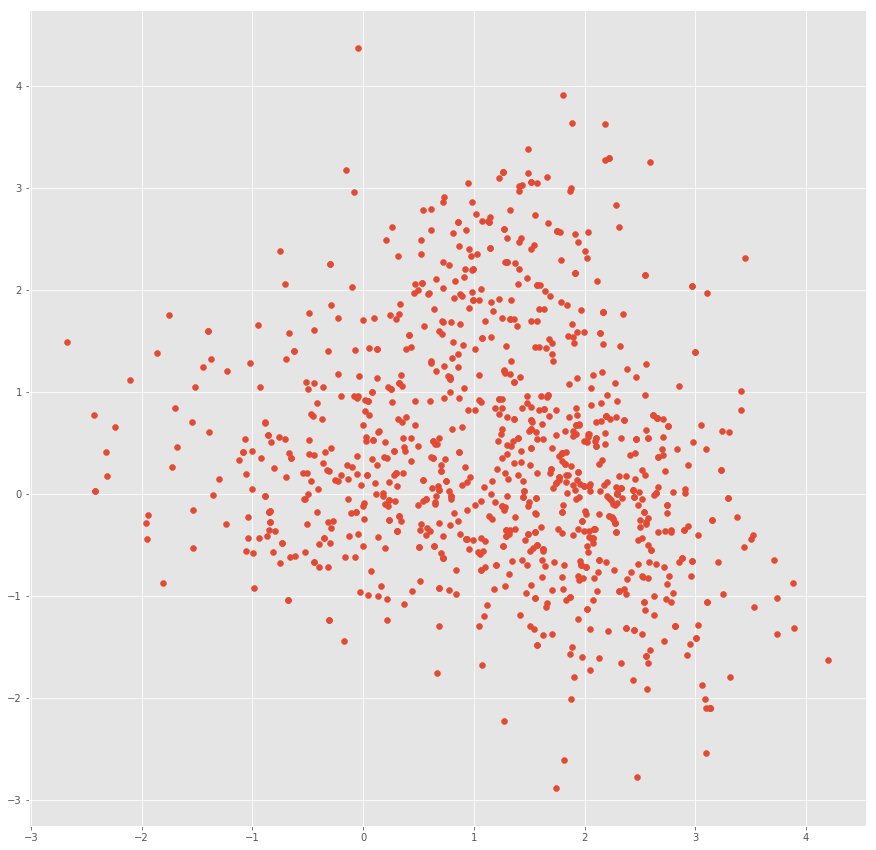

In [10]:
plt.figure(figsize=(15, 15))
plt.scatter(X[:, 0], X[:, 1])

#### 3.2: a) Forget about the true parameters $\pi_{1:K}$ , $\mu_{1:K}$ and  $\Sigma_{1:K}$ for now. By only considering the dataset ${\{x_n\}}^N_{n=1}$ that is generated in the previous step, run the EM algorithm after randomly initializing the parameter estimates ${π_{1:K}}^{(0)}$ ,${μ_{1:K}}^{(0)}$ , and ${Σ_{1:K}}^{(0)}$ . Visualize the intermediate results by plotting the contours of the estimated Gaussians.

***Plotting the clusters with the true parametere $\pi_{1:K}$ , $\mu_{1:K}$ and  $\Sigma_{1:K}$ :*** 

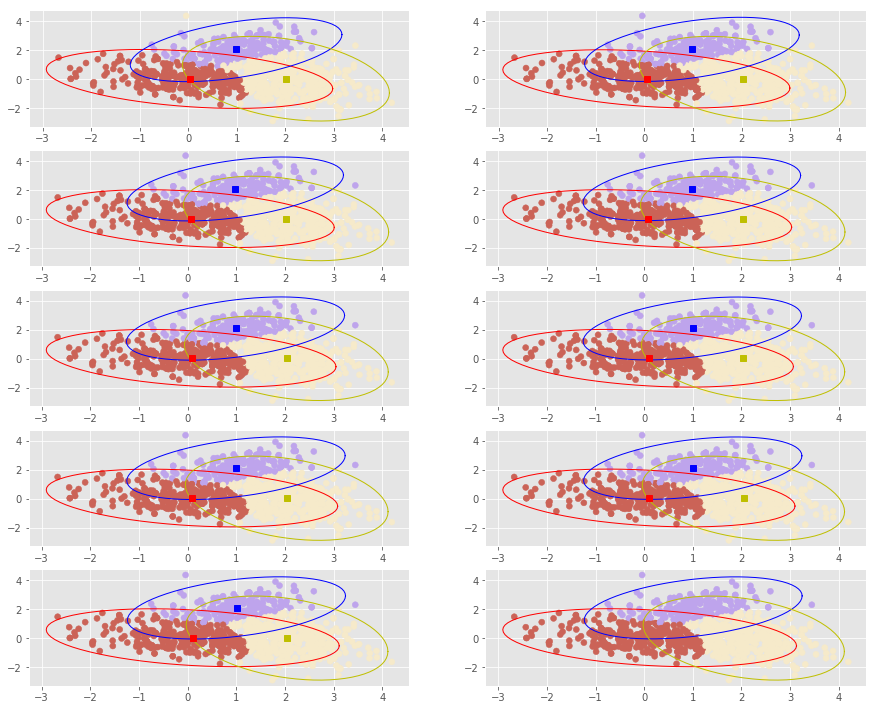

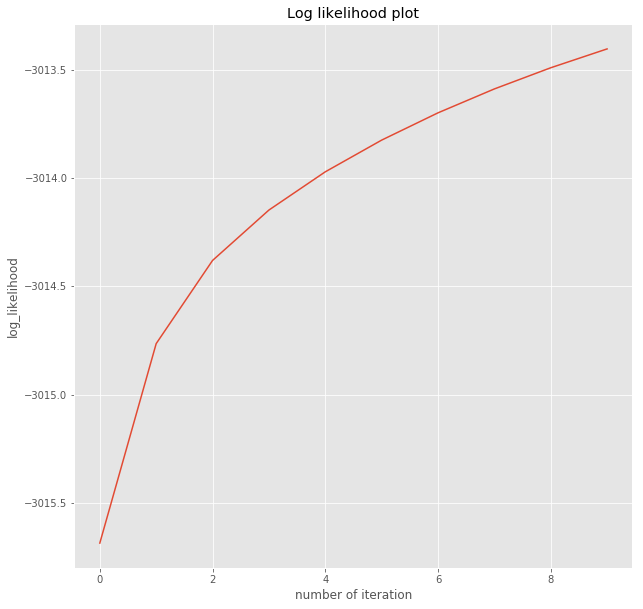

In [11]:
M_step(X, log_pi, log_mu, log_sigma, niter=10);

***Plotting the clusters with randomly generated initial $\pi_{1:K}$ , $\mu_{1:K}$ and  $\Sigma_{1:K}$ :*** 

In [12]:
def generate_pi_mu_sigma(K, f=2):
    mu = np.random.rand(K, f)*5
    pi = np.random.rand(K)
    sigma = np.random.rand(K, f, f)
    return pi/np.sum(pi), mu, np.array([sigma[i, :, :].dot(sigma[i, :, :].T) for i in range(K)])

**I tried to solve the problem
the non-invertibility of the matrix during intermediate calculations, by regenerating the different parameters.**

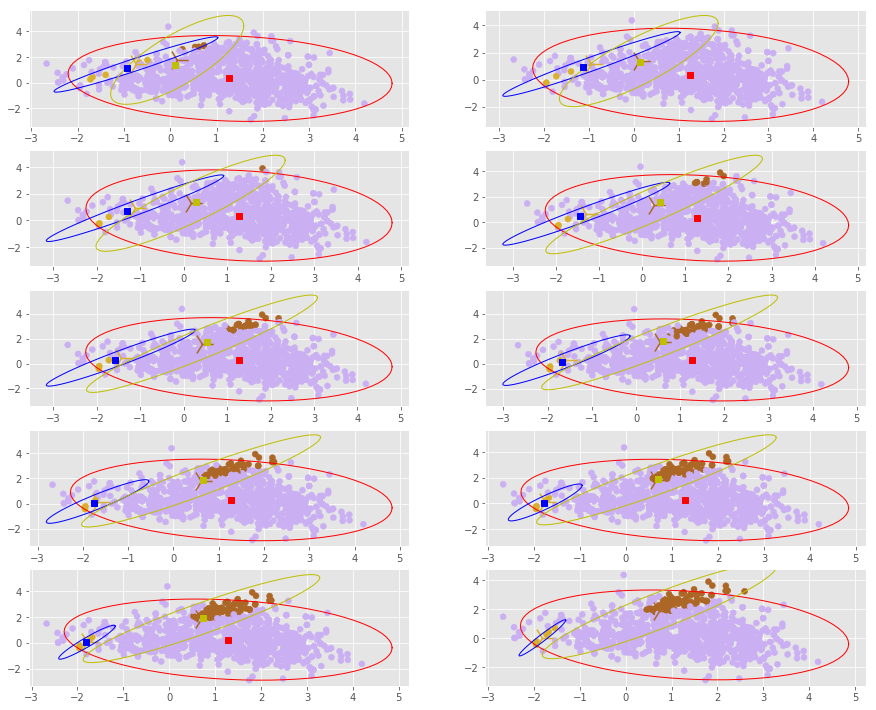

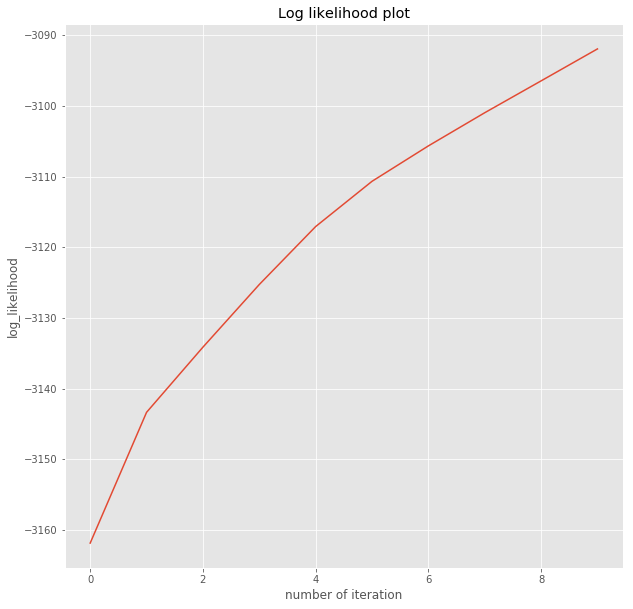

In [13]:
K = 3
value = False
while(value == False):
    try:
        pi, mu, sigma = generate_pi_mu_sigma(K=K)
        M_step(X, pi, mu, sigma, niter=10)
        value = True
    except np.linalg.LinAlgError:
        plt.clf()
        Value = False

#### 3.2: c) Run the EM algorithm with different initializations for $\pi_{1:K}^{(0)}$ , $\mu_{1:K}^{(0)}$ and  $\Sigma_{1:K}^{(0)}$.  How sensitive is the algorithm for different initial values?

<Figure size 1080x1080 with 0 Axes>

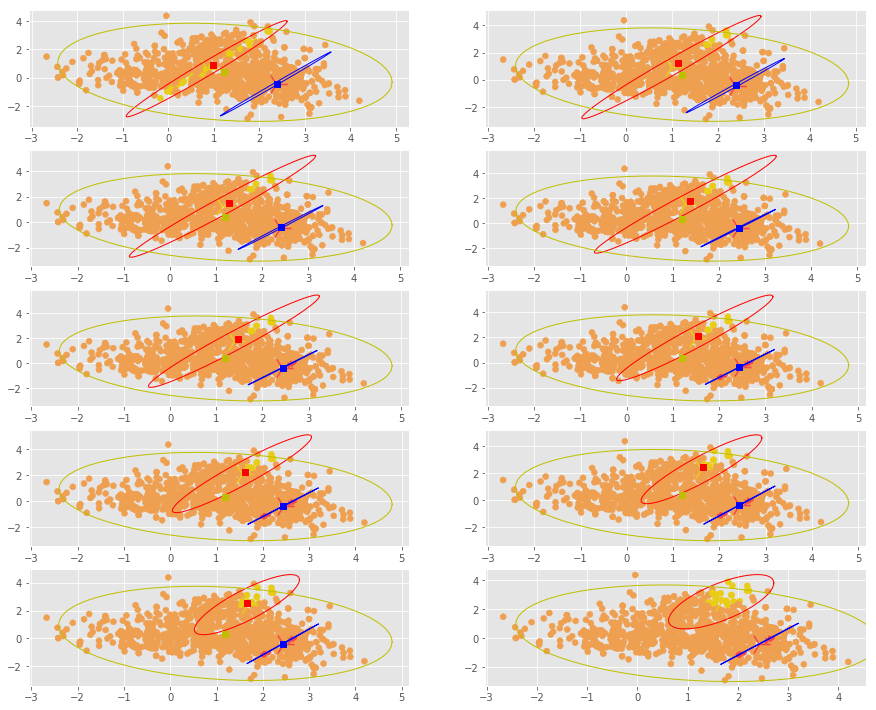

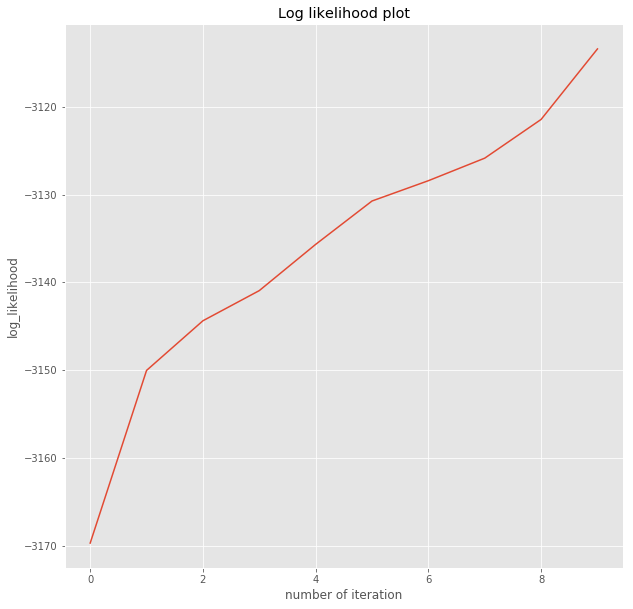

In [14]:
K = 3
value = False
while(value == False):
    try:
        pi, mu, sigma = generate_pi_mu_sigma(K=K)
        M_step(X, pi, mu, sigma, niter=10)
        value = True
    except np.linalg.LinAlgError:
        plt.clf()
        Value = False

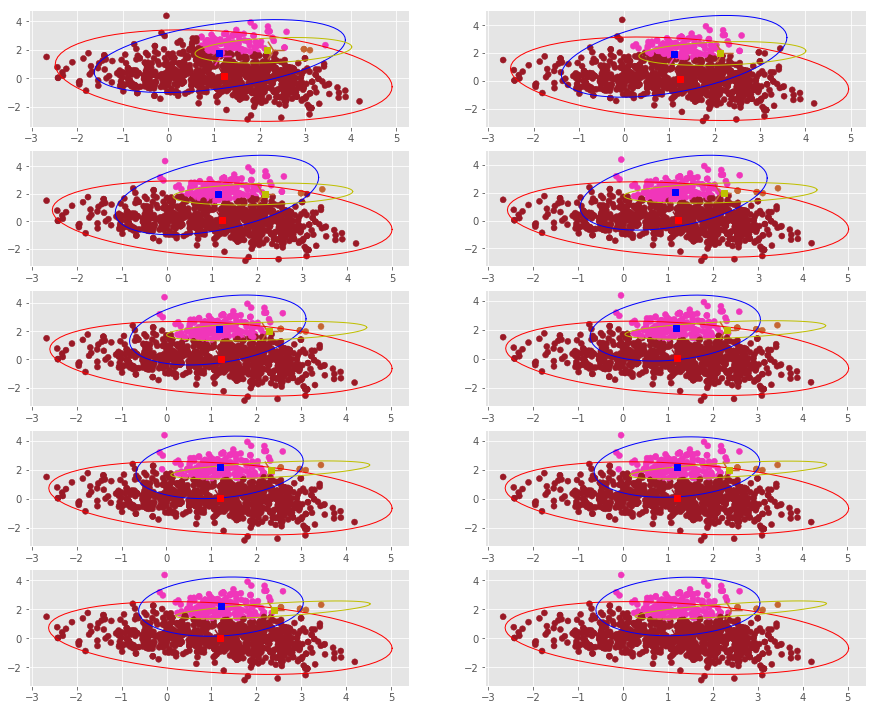

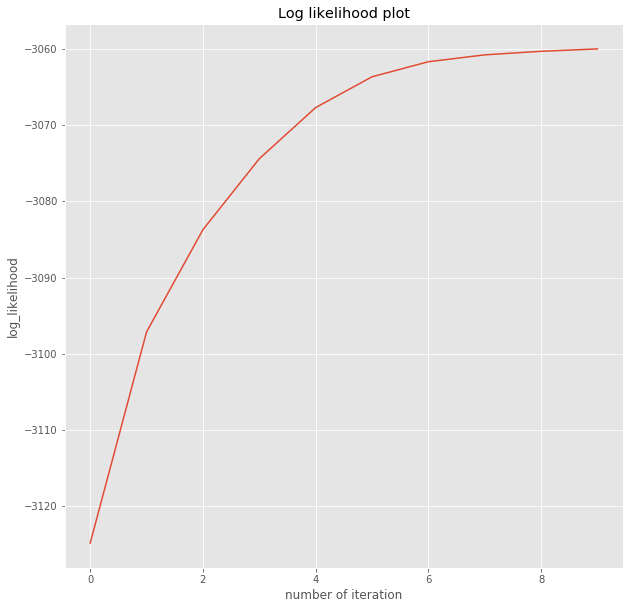

In [15]:
K = 3
value = False
while(value == False):
    try:
        pi, mu, sigma = generate_pi_mu_sigma(K=K)
        M_step(X, pi, mu, sigma, niter=10)
        value = True
    except np.linalg.LinAlgError:
        plt.clf()
        Value = False

**Interpretation:**

by comparing the different figures that are generated from different initializationd, we find that we do not get the same cluster distribution.
We can conclude that the algorithm is sensitive to the initial value